In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from pathlib import Path

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets, metrics, preprocessing
from sklearn.model_selection import GridSearchCV, learning_curve

%matplotlib inline

In [2]:
path='.\Datasets\\'
file = 'Barclays.csv'
df = pd.read_csv(path + file, sep=',')

<AxesSubplot:>

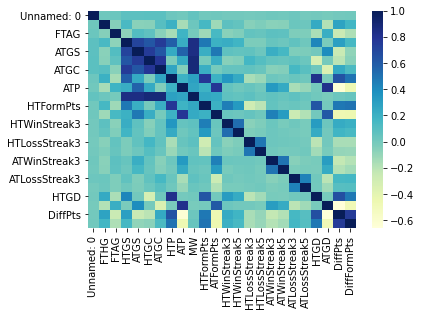

In [3]:
corr =df.corr()
sns.heatmap(corr, cmap="YlGnBu", annot=False)

In [4]:
tr_split = 0.7


# Calculate train/test size
rows, cols = df.shape
tr_size = int(rows*tr_split)
te_size = rows - tr_size

# Split dataset
train_df = df.iloc[:tr_size]
test_df = df.iloc[tr_size:]

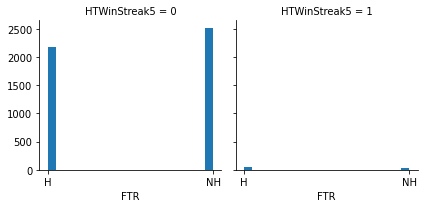

In [5]:
g = sns.FacetGrid(train_df, col='HTWinStreak5')
_ = g.map(plt.hist, 'FTR', bins=20)

In [6]:
#DATA PREPROCESSING
features = ['HomeTeam', 'AwayTeam', 'DiffPts', 'ATWinStreak5', 'ATWinStreak3', 'HTWinStreak5', 'HTWinStreak3','DiffFormPts','DiffPts']
y_target = 'FTR'


# Drop rows with nan
data = df.dropna()

for col in ['HomeTeam', 'AwayTeam']:

    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

x = data[features]
y = data['FTR']

# x = bundesliga.drop('FTR',axis=1)
# y = bundesliga['FTR']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(None)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [25]:
 #CLASSIFIER
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train) 
y_pred=rfc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.59      0.56      0.57       634
          NH       0.63      0.66      0.65       734

    accuracy                           0.61      1368
   macro avg       0.61      0.61      0.61      1368
weighted avg       0.61      0.61      0.61      1368

[[352 282]
 [247 487]]


Accuracy 61.33
Normalized confusion matrix


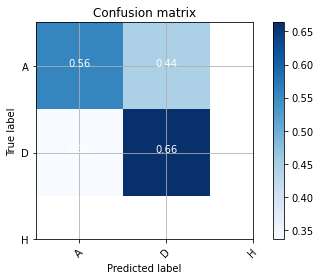

In [26]:
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy %.2f" % (accuracy*100))
plot_confusion_matrix(cm, classes= ['A', 'D','H'], normalize=True)

In [27]:
#SVM
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.65      0.45      0.53       634
          NH       0.62      0.78      0.70       734

    accuracy                           0.63      1368
   macro avg       0.64      0.62      0.61      1368
weighted avg       0.63      0.63      0.62      1368

[[288 346]
 [158 576]]


Accuracy 63.16
Normalized confusion matrix


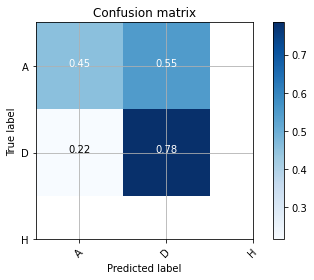

In [28]:
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy %.2f" % (accuracy*100))
plot_confusion_matrix(cm, classes= ['A', 'D','H'], normalize=True)

In [36]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           H       0.53      0.52      0.53       634
          NH       0.59      0.60      0.59       734

    accuracy                           0.56      1368
   macro avg       0.56      0.56      0.56      1368
weighted avg       0.56      0.56      0.56      1368

[[332 302]
 [296 438]]


Accuracy 56.29
Normalized confusion matrix


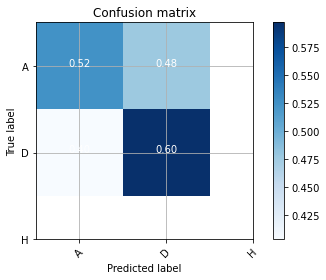

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy %.2f" % (accuracy*100))
plot_confusion_matrix(cm, classes= ['A', 'D','H'], normalize=True)

In [34]:
#NEURAL NETWORK
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(x_train, y_train)
pred_mlpc= mlpc.predict(x_test)
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           H       0.66      0.46      0.54       634
          NH       0.63      0.79      0.70       734

    accuracy                           0.64      1368
   macro avg       0.65      0.63      0.62      1368
weighted avg       0.65      0.64      0.63      1368

[[294 340]
 [151 583]]


Accuracy 55.70
Normalized confusion matrix


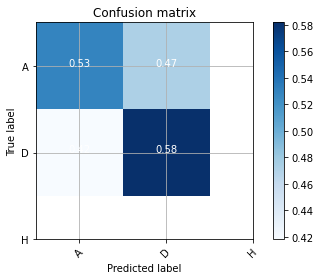

In [35]:

print("Accuracy %.2f" % (accuracy*100))
plot_confusion_matrix(cm, classes= ['A', 'D','H'], normalize=True)

In [33]:
LogisticRegression= LogisticRegression(random_state=0)
LogisticRegression.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

TypeError: 'LogisticRegression' object is not callable

Accuracy 57.02
Normalized confusion matrix


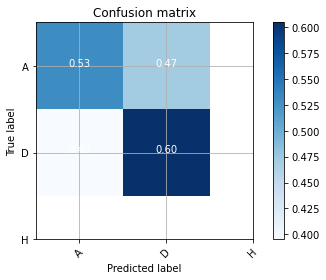

In [19]:

print("Accuracy %.2f" % (accuracy*100))
plot_confusion_matrix(cm, classes= ['A', 'D','H'], normalize=True)